<a href="https://colab.research.google.com/github/MarkovMarkowitz/MarkovMarkowitz/blob/main/ON3_AnalyzeAndReplacePortfolio_v5_TIMESERIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:


# @title Markov Markowitz Company / Portfolio Analyzer v3 { vertical-output: true }
# @markdown ---
# @markdown Input parameters for asset selection

BEST_PORTFOLIO_FILE = "Best_PF_For_bist30.csv"
EXCHANGE = "BIST30 " # @param {type:"string"}
SHOPPING_LIST_FILE = "ShoppingList.csv" # @param {type:"string"}
YAHOO_PF_FILE = "ALPER.csv" # @param {type:"string"}

OFFSET = 0 # @param {type:"number"}
LOOKBACK = 193 # @param {type:"number"}
PURSE = 100241  # @param {type: "number"}
EXCHANGE = "bist30"  # @param ['bist30', 'bist100', 'dow30', 'sp500']

# @markdown ---




In [94]:
from datetime import date, timedelta, datetime
import yfinance as yf

offset = OFFSET
look_back = LOOKBACK
CURRENT_T2 = PURSE
exchange = EXCHANGE

current_date = date.today().isoformat()
days_before = (date.today() - timedelta(days=look_back+offset)).isoformat()
days_after =  (date.today() + timedelta(days=1-offset)).isoformat()

print("\nCurrent Date: ",current_date)
print(f"{look_back+offset} days before current date: ",days_before)
print(f"{offset} days before current date: ",days_after)

STEP = 0
CHART = 0
dateStart = days_before
START_DATE = dateStart
END_DATE   = days_after
START_DATE, END_DATE
start_time = datetime.now()


Current Date:  2023-09-08
193 days before current date:  2023-02-27
0 days before current date:  2023-09-09


In [95]:
!pip install pyfolio
import pandas as pd
import numpy as np
import pyfolio as py
import io
from google.colab import files



## Special Eyes-Only Report on
# **Individual Portfolio Analysis and Further Suggestions**
#### Report written by **Markov Markowitz Company**
#### Report issued on **27.08.2023**

Any comments should be sent to: info@markovmarkowitz.com


# Step 1: Analysis of present portfolio

Dear Customer,

Per your request, we analysed your present portfolio, as of **27.08.2023** as follows:

In [96]:
yahoo_pf_file = YAHOO_PF_FILE
best_pf_file = BEST_PORTFOLIO_FILE
exchange = EXCHANGE
shopping_list_file = SHOPPING_LIST_FILE


print("Selected = ", BEST_PORTFOLIO_FILE, EXCHANGE, SHOPPING_LIST_FILE, YAHOO_PF_FILE)

Selected =  Best_PF_For_bist30.csv bist30 ShoppingList.csv ALPER.csv


In [97]:
# show current directory
import os
from pathlib import Path
from IPython.display import display
from PIL import Image

from google.colab import files


def LoadFile(file):
  my_file = Path(f"/content/{file}")
  if my_file.is_file():
    print(f"File {file} is present")
  else:
    print(f"Please upload {file} to be analysed:")
    print(70*'=')
    data = files.upload_file(file)
    display(data)

LoadFile(yahoo_pf_file)
MYPF = pd.DataFrame(pd.read_csv(yahoo_pf_file))

LoadFile(best_pf_file)




File ALPER.csv is present
File Best_PF_For_bist30.csv is present


In [98]:
MYPF['Purchased Value'] = MYPF['Purchase Price'] * MYPF['Quantity']
MYPF['Market Value'] = MYPF['Current Price'] * MYPF['Quantity']
MYPF['PnL %'] = (MYPF['Market Value'] - MYPF['Purchased Value']) / MYPF['Purchased Value'] *100
MYPF.index = MYPF.Symbol
MYPF

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment,Purchased Value,Market Value,PnL %
Symbol,,,,,,,,,,,,,,,,,,,
ISCTR.IS,ISCTR.IS,24.70,2023/09/08,18:09 TRST,0.140001,24.60,25.00,24.26,220448093,20230907,23.39,505.0,0.0,NaN,NaN,NaN,11811.95,12473.50,5.600684
GUBRF.IS,GUBRF.IS,356.80,2023/09/08,18:09 TRST,2.399994,355.10,366.40,352.40,5925313,20230907,354.30,45.0,0.0,NaN,NaN,NaN,15943.50,16056.00,0.705617
KOZAA.IS,KOZAA.IS,69.25,2023/09/08,18:09 TRST,0.150002,69.20,70.90,68.25,33291953,20230907,68.50,175.0,0.0,NaN,NaN,NaN,11987.50,12118.75,1.094891
GARAN.IS,GARAN.IS,52.30,2023/09/08,18:10 TRST,-0.100002,52.60,53.85,51.90,44993485,20230907,51.79,285.0,0.0,NaN,NaN,NaN,14760.15,14905.50,0.984746
EKGYO.IS,EKGYO.IS,9.48,2023/09/08,18:09 TRST,-0.120001,9.64,9.69,9.41,324741574,20230907,9.60,2019.0,0.0,NaN,NaN,NaN,19382.40,19140.12,-1.250000
FROTO.IS,FROTO.IS,905.90,2023/09/08,18:09 TRST,25.900024,881.10,909.90,875.90,1836923,20230907,893.00,4.0,0.0,NaN,NaN,NaN,3572.00,3623.60,1.444569
ASELS.IS,ASELS.IS,43.50,2023/09/08,18:09 TRST,1.500000,42.00,43.54,41.68,127507385,20230907,42.00,504.0,0.0,NaN,NaN,NaN,21168.00,21924.00,3.571429


In [99]:
MYPF['Start PF %'] = np.round((MYPF['Purchased Value'] / MYPF['Purchased Value'].sum()) *100, 5)
MYPF['End PF %'] = np.round((MYPF['Market Value'] / MYPF['Market Value'].sum()) *100, 5)

In [100]:
MYPF.sort_values( by=["Start PF %"], ascending=[False], inplace = True)


In [101]:
MYPF = MYPF[['Quantity','Purchase Price','Purchased Value','Current Price','Market Value',  'Start PF %', 'End PF %', 'PnL %']]

In [102]:
CURRENT_T2 = MYPF['Market Value'].sum()
CURRENT_T2

100241.47

In [103]:
PV = MYPF['Purchased Value'].sum()
FV = MYPF['Market Value'].sum()

MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])
MYPF



<ipython-input-103-f0354df3cca1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['Purchase Amount'] = np.trunc(MYPF['End PF %']*CURRENT_T2/100)
<ipython-input-103-f0354df3cca1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MYPF['End Quantity'] = np.trunc(MYPF['Purchase Amount'] / MYPF['Current Price'])


,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ASELS.IS,504.0,42.00,21168.00,43.50,21924.00,21.46301,21.87119,3.571429,21924.0,504.0
EKGYO.IS,2019.0,9.60,19382.40,9.48,19140.12,19.65252,19.09401,-1.250000,19140.0,2018.0
GUBRF.IS,45.0,354.30,15943.50,356.80,16056.00,16.16570,16.01732,0.705617,16055.0,44.0
GARAN.IS,285.0,51.79,14760.15,52.30,14905.50,14.96586,14.86959,0.984746,14905.0,284.0
KOZAA.IS,175.0,68.50,11987.50,69.25,12118.75,12.15456,12.08956,1.094891,12118.0,174.0
ISCTR.IS,505.0,23.39,11811.95,24.70,12473.50,11.97657,12.44345,5.600684,12473.0,504.0
FROTO.IS,4.0,893.00,3572.00,905.90,3623.60,3.62178,3.61487,1.444569,3623.0,3.0


In [104]:
def DownloadAssetsAndWriteToCSVs(names):
  price_list = []
  print(LENGTH*"*")
  print("Starting Download ...")
  print(LENGTH*"*")
  for tick in names:
    print(f"Downloading {tick}")
    yf_tick = yf.Ticker(tick)
    df = yf_tick.history(interval='1d', auto_adjust=True, start=START_DATE, end=END_DATE, back_adjust = True, rounding=True)
    df.dropna(how='all', inplace=True)
    price_list.append(df)
  print(LENGTH*"*")
  print(LENGTH*"*")

  # Save datafiles to disk

  for i,df in enumerate(price_list):
        df.to_csv(f"{names[i]}.csv")
  print(price_list)



In [105]:
def ConstructPortfolioTimeSeries(portfolio, NEW_DOWNLOAD):

    if NEW_DOWNLOAD:
        DownloadAssetsAndWriteToCSVs(portfolio.index)
    import yfinance as yf
    print(f"Construct Time series...")
    # print(f"portfolio = {portfolio} is input")
    print(70*'=')

    Residue_Cash = CURRENT_T2
    #os.chdir(wd)

    OrderedTable = pd.DataFrame()
    df = pd.DataFrame()
    names = portfolio.index
    #print(names)
    filename = f"{names[0]}.csv"
    #print(filename)

    portfolio['Portfolio_Weights'] = portfolio['End PF %']/100


    df = pd.read_csv(filename) #change 1
    OrderedTable["Date"] = df.iloc[:,0] #change 3
    for tick in names:
      #print(f"Fetching {tick}")
      filename = f"{tick}.csv"
      #filename = f"{names[0]+'.IS'}.csv"
      df = pd.read_csv(filename)
      #df = pd.read_csv(filename, index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",") #change 2
      OrderedTable[f"{tick}"] = df['Close']  # get each ETFs column write inside OrderedTable


    print("Ordered Table: \n",OrderedTable)

    portfolio['InitialPrices'] = OrderedTable.iloc[0,1:].values
    #print(f"\n Initial prices: \n{InitialPrices} \n")

    portfolio['FinalPrices'] = OrderedTable.iloc[-1,1:].values
    #print(f"\n Final prices: {FinalPrices}")

    Update_Capital = Residue_Cash # add the cash not used for stocks

    portfolio['Portfolio_Amounts'] = np.multiply(Update_Capital, portfolio['Portfolio_Weights'] )
    #print(f" Portfolio amounts: \n{Portfolio_Amounts} \n")

    portfolio['Portfolio_Shares'] = np.trunc(portfolio['Portfolio_Amounts'] / portfolio['InitialPrices'] )  # determine shares

    #print(f" Portfolio shares: \n{portfolio['Portfolio_Shares']} ")

    portfolio['Purchased Value'] = portfolio['InitialPrices'] * portfolio['Portfolio_Shares']

    portfolio['Market Value'] = portfolio['FinalPrices'] * portfolio['Portfolio_Shares']
    portfolio['PnL %'] = (portfolio['Market Value'] - portfolio['Purchased Value']) / MYPF['Purchased Value'] *100
    portfolio['Start PF %'] = portfolio['Purchased Value'] / portfolio['Purchased Value'].sum() *100
    portfolio['End PF %'] = portfolio['Market Value'] / portfolio['Market Value'].sum() *100

    portfolio['Market Value'] = pd.to_numeric(portfolio['Market Value']).round(2)
    portfolio['PnL %'] = pd.to_numeric(portfolio['PnL %']).round(2)
    portfolio['Start PF %'] = pd.to_numeric(portfolio['Start PF %']).round(2)
    portfolio['End PF %'] = pd.to_numeric(portfolio['End PF %']).round(2)

    Prices = OrderedTable.iloc[:,1:].values

    FirstPrices = OrderedTable.iloc[0,0:len(names)].values
    FirstPrices

    OrderedTable['PF_Value'] = np.dot(portfolio['Portfolio_Shares'], Prices.T)  # PF_VALUE = dot product of shares and their prices !!!!
    #print(OrderedTable['PF_Value'])

    Residue_Cash = Update_Capital - OrderedTable.PF_Value.iloc[0] # !!!
    print(f" Residue cash: {Residue_Cash} \n")

    OrderedTable['PF_Value'] += Residue_Cash

    Update_Capital = OrderedTable.PF_Value.iloc[-1] # Update_Captial =  value of the PF at the end of every quarter

    #print(f" Portfolio capital at the end of period: {Update_Capital} \n")
    #print(" Ordered Table: \n")

    OrderedTable['pct_change'] = OrderedTable['PF_Value'].pct_change()
    OrderedTable.set_index("Date", inplace = True)
    OrderedTable.index = pd.to_datetime(OrderedTable.index)  # PYFOLIO nun düzgün çalışması icin bu gerekli
    return OrderedTable, portfolio

In [106]:
def ShowTearSheet(OrderedPctChange, which="Current"):
    print(f"Showing Tearsheet of {which} Portfolio...")
    print(70*'=')
    import pyfolio
    print(f"********* PORTFOLIO TEARSHEET *************** ")

    try:
        simple_tear_sheet = pyfolio.create_simple_tear_sheet(OrderedPctChange)
        print("********* end of TEARSHEET **************\n")
        #simple_tear_sheet.savefig(f"Chart_{CHART}_Ret_Tear_sheet.jpg", format='jpg', dpi=300)
        #from IPython.display import Image
        #Image(url=f"Chart_{CHART}_Simple_Tear_sheet.jpg")

    except Exception as e:
        print("Error generating returns tear sheet:", e)
        returns_tear_sheet = None

In [107]:
show_df = pd.DataFrame({"assets":MYPF.index.T, "%": np.round(MYPF['End PF %'],4), "amounts": MYPF['Market Value']})
#show_df = show_df.loc[(show_df["%"]>0)]
show_df = MYPF.sort_values(by=['End PF %'],ascending=False)
show_df



,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity
Symbol,,,,,,,,,,
ASELS.IS,504.0,42.00,21168.00,43.50,21924.00,21.46301,21.87119,3.571429,21924.0,504.0
EKGYO.IS,2019.0,9.60,19382.40,9.48,19140.12,19.65252,19.09401,-1.250000,19140.0,2018.0
GUBRF.IS,45.0,354.30,15943.50,356.80,16056.00,16.16570,16.01732,0.705617,16055.0,44.0
GARAN.IS,285.0,51.79,14760.15,52.30,14905.50,14.96586,14.86959,0.984746,14905.0,284.0
ISCTR.IS,505.0,23.39,11811.95,24.70,12473.50,11.97657,12.44345,5.600684,12473.0,504.0
KOZAA.IS,175.0,68.50,11987.50,69.25,12118.75,12.15456,12.08956,1.094891,12118.0,174.0
FROTO.IS,4.0,893.00,3572.00,905.90,3623.60,3.62178,3.61487,1.444569,3623.0,3.0


In [108]:
LENGTH = 64
print("Dear Customer, now starting to analyze your current portfolio performance...")
print(LENGTH*"-")
print(LENGTH*"-")

OrderedTimeSeries, IDEAL_PF = ConstructPortfolioTimeSeries(show_df, NEW_DOWNLOAD=True)
OrderedTimeSeries




Dear Customer, now starting to analyze your current portfolio performance...
----------------------------------------------------------------
----------------------------------------------------------------
****************************************************************
Starting Download ...
****************************************************************
****************************************************************
****************************************************************
[                            Open   High    Low  Close     Volume  Dividends  \
Date                                                                          
2023-02-27 00:00:00+03:00  26.65  27.73  25.90  27.73   85697052        0.0   
2023-02-28 00:00:00+03:00  27.75  28.15  27.25  27.60   76802488        0.0   
2023-03-01 00:00:00+03:00  28.30  28.45  27.65  27.75   84501442        0.0   
2023-03-02 00:00:00+03:00  27.60  28.65  27.60  27.67  137556126        0.0   
2023-03-03 00:00:00+03:00  27.40  27

,ASELS.IS,EKGYO.IS,GUBRF.IS,GARAN.IS,ISCTR.IS,KOZAA.IS,FROTO.IS,PF_Value,pct_change
Date,,,,,,,,,
2023-02-27 00:00:00+03:00,27.73,8.26,234.8,21.93,10.79,46.00,542.63,100241.47,NaN
2023-02-28 00:00:00+03:00,27.60,8.11,231.7,21.63,10.55,45.64,538.33,98978.8,-0.012596
2023-03-01 00:00:00+03:00,27.75,8.15,231.9,21.89,10.81,44.08,570.76,99464.98,0.004912
2023-03-02 00:00:00+03:00,27.67,7.81,223.7,22.06,11.13,42.22,575.55,98081.31,-0.013911
2023-03-03 00:00:00+03:00,27.30,7.82,227.8,22.19,10.95,41.64,574.77,97813.95,-0.002726
...,...,...,...,...,...,...,...,...,...
2023-09-04 00:00:00+03:00,38.56,8.80,354.4,51.25,22.36,72.45,900.00,160564.92,0.022039
2023-09-05 00:00:00+03:00,38.50,9.44,351.3,51.90,23.58,70.90,893.20,163192.82,0.016367
2023-09-06 00:00:00+03:00,41.18,9.24,354.9,51.45,24.56,68.75,879.00,165268.1,0.012717


In [109]:
np.mean(OrderedTimeSeries['pct_change'].dropna()) *100

0.42140303477475494

Showing Tearsheet of ALPER.csv Portfolio...
********* PORTFOLIO TEARSHEET *************** 


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:648: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for stat, value in perf_stats[column].iteritems():


Start date,2023-02-28
End date,2023-09-08
Total months,6
,Backtest
Annual return,170.5%
Cumulative returns,68.4%
Annual volatility,36.2%
Sharpe ratio,2.93
Calmar ratio,8.79
Stability,0.74
Max drawdown,-19.4%


/usr/local/lib/python3.10/dist-packages/pyfolio/plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


********* end of TEARSHEET **************



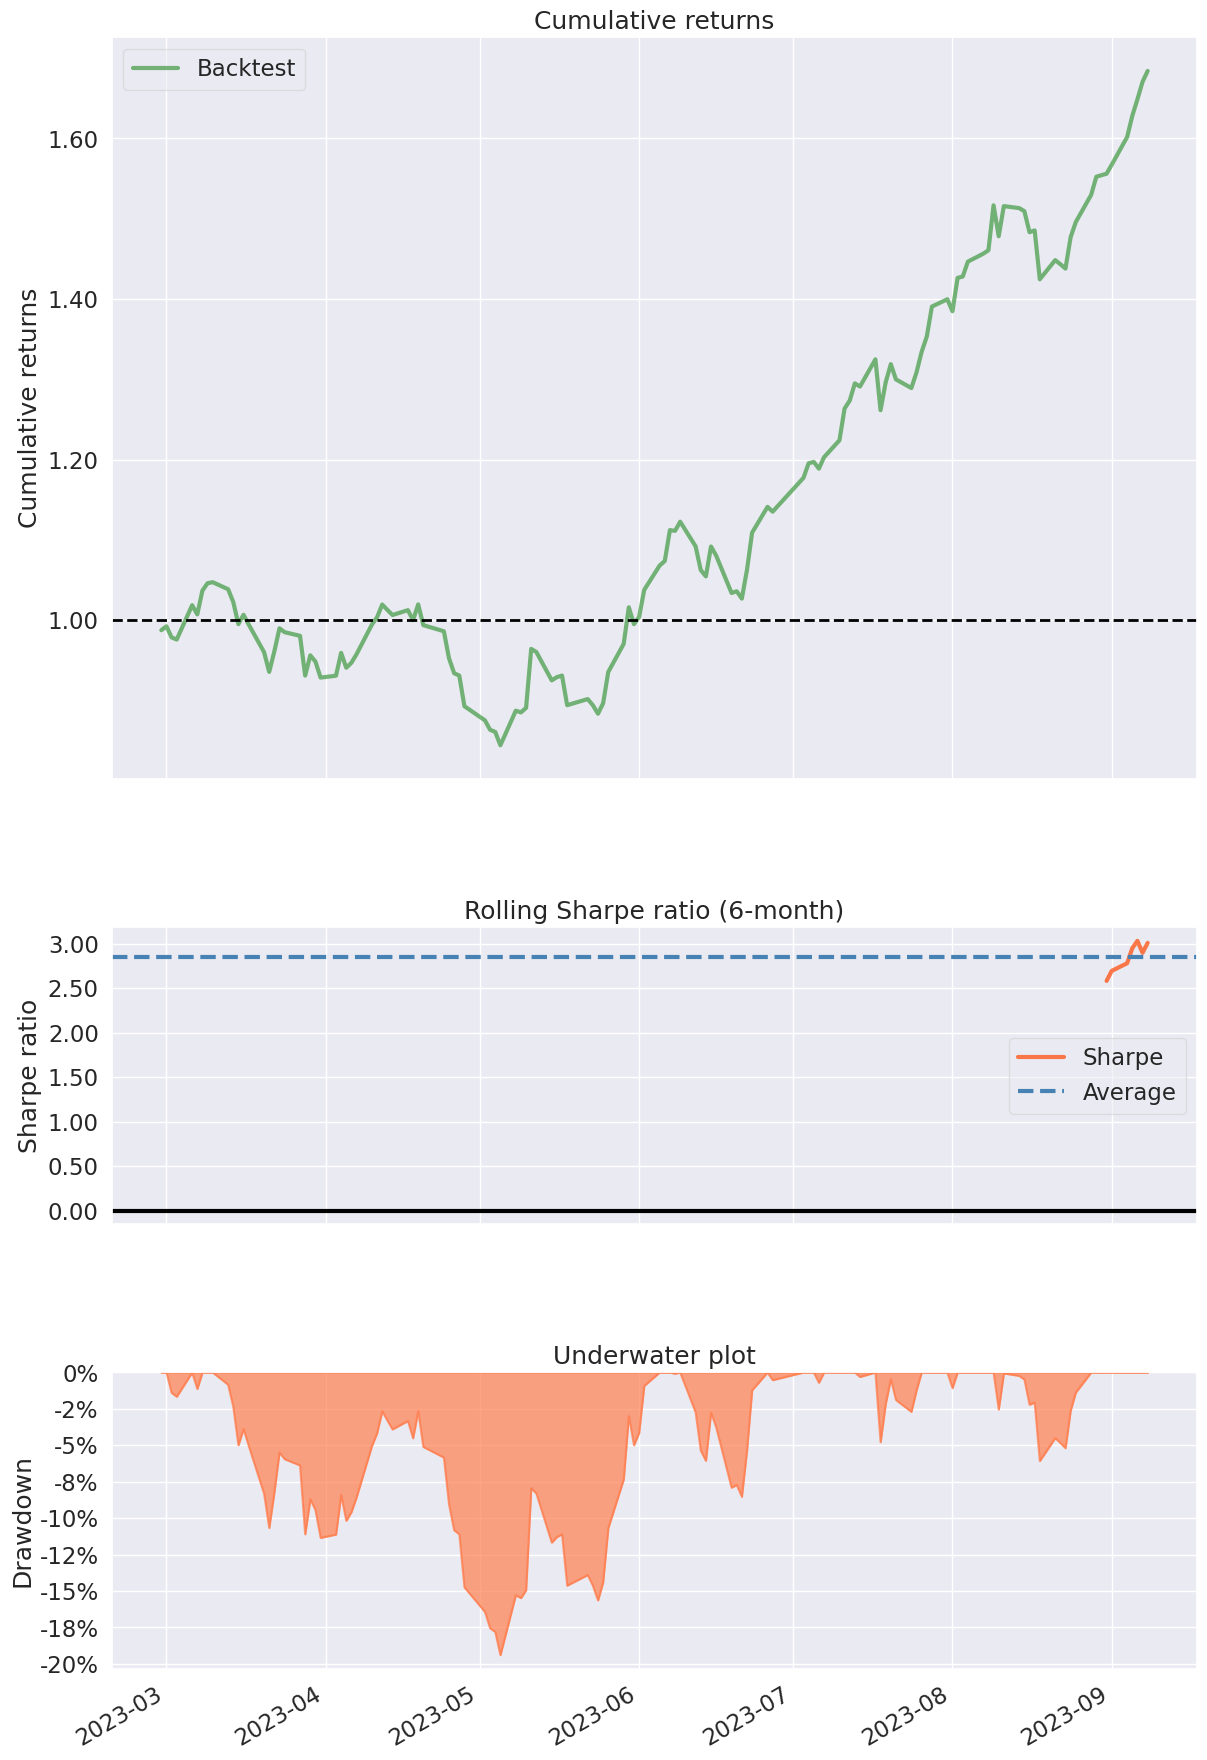

In [110]:
ShowTearSheet(OrderedTimeSeries['pct_change'].dropna(), YAHOO_PF_FILE)

In [111]:
import pyfolio as pf
pystats_df = pf.timeseries.perf_stats(OrderedTimeSeries['pct_change'].dropna())
max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
sharpe_ratio = pf.timeseries.sharpe_ratio(OrderedTimeSeries['pct_change'].dropna())
print("CURRENT PORTFOLIO PERFORMANCE")
pystats_df

CURRENT PORTFOLIO PERFORMANCE


/usr/local/lib/python3.10/dist-packages/pyfolio/timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()
<ipython-input-111-97d2e39f3402>:3: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  max_drawdown = np.abs(100*pf.timeseries.max_drawdown(OrderedTimeSeries['pct_change'].dropna()))
<ipython-input-111-97d2e39f3402>:4: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyrical package instead.
  annual_return = pf.timeseries.annual_return(OrderedTimeSeries['pct_change'].dropna())
<ipython-input-111-97d2e39f3402>:5: DeprecationWarning: Risk functions in pyfolio.timeseries are deprecated and will be removed in a future release. Please install the empyri

Annual return          1.704978
Cumulative returns     0.684114
Annual volatility      0.362479
Sharpe ratio           2.929650
Calmar ratio           8.787794
Stability              0.744172
Max drawdown          -0.194017
Omega ratio            1.601954
Sortino ratio          4.887819
Skew                   0.097606
Kurtosis               0.298444
Tail ratio             1.078729
Daily value at risk   -0.041454
dtype: float64

In [112]:
IDEAL_PF

,Quantity,Purchase Price,Purchased Value,Current Price,Market Value,Start PF %,End PF %,PnL %,Purchase Amount,End Quantity,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares
Symbol,,,,,,,,,,,,,,,
ASELS.IS,504.0,42.00,21906.7,43.50,34365.00,21.97,20.42,58.85,21924.0,504.0,0.218712,27.73,43.5,21924.002362,790
EKGYO.IS,2019.0,9.60,19138.42,9.48,21965.16,19.19,13.05,14.58,19140.0,2018.0,0.190940,8.26,9.48,19140.116306,2317
GUBRF.IS,45.0,354.30,15966.4,356.80,24262.40,16.01,14.42,52.03,16055.0,44.0,0.160173,234.8,356.8,16055.997023,68
GARAN.IS,285.0,51.79,14890.47,52.30,35511.70,14.93,21.10,139.71,14905.0,284.0,0.148696,21.93,52.3,14905.495599,679
ISCTR.IS,505.0,23.39,12473.24,24.70,28553.20,12.51,16.97,136.13,12473.0,504.0,0.124435,10.79,24.7,12473.497199,1156
KOZAA.IS,175.0,68.50,12098.0,69.25,18212.75,12.13,10.82,51.01,12118.0,174.0,0.120896,46.0,69.25,12118.752661,263
FROTO.IS,4.0,893.00,3255.78,905.90,5435.40,3.26,3.23,61.02,3623.0,3.0,0.036149,542.63,905.9,3623.598827,6


In [113]:


# A function to generate the avg return, risk and the sharpe ratio of the portfolio
# correponding to the weight array passed
def portfolio_stats(weight):

    # Convert to array in case list was passed instead.
    weight = np.array(weight)
    port_return = np.sum(log_returns.mean() * weight) * 252
    #port_return = log_returns.mean() * weight
    port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight)))
    #port_risk = np.sqrt(np.dot(weight.T, np.dot(log_returns.cov() * 252, weight))) / np.sqrt(252)
    sharpe = (port_return - risk_free_rate)/port_risk

    return {'return': port_return, 'risk': port_risk, 'sharpe': sharpe}

In [114]:
def EvaluatePortfolio(weight):

    pf_stats = portfolio_stats(weight)
    pf_return = pf_stats['return']
    pf_risk = pf_stats['risk']
    pf_sharpe = pf_stats['sharpe']
    return pf_stats




In [115]:

def Monte_Carlo(iterations):
    portfolio_returns = []
    portfolio_risks = []
    for x in range (iterations):
        weight = RandWeights(length)
        pf_stats = portfolio_stats(weight)
        portfolio_returns.append(pf_stats['return'])
        portfolio_risks.append(pf_stats['risk'])

    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)
    return portfolio_returns, portfolio_risks


In [116]:
def OptimizationWithSharpeRatio():

    def FindNegSharpe(weight):
        return (-1)*portfolio_stats(weight)['sharpe']

    res = minimize(
          FindNegSharpe,
          RandWeights(length),
          method = 'SLSQP',
          constraints=[
            {'type': 'eq', 'fun': lambda w: np.sum(w) - 1.},
          ],
          bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
        )

    return res


In [117]:
def FindWeights():
    WEIGHT_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['return']
    STDDEV_HSR = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)['risk']/np.sqrt(252)
    Optimal_weights_for_Percent_Returns = OptimizationForAGivenReturn(WEIGHT_HSR).x
    print(portfolio_stats(Optimal_weights_for_Percent_Returns))
    print(np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4))
    return np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

In [118]:
# A function for generating a numpy array containing random weights that add upto 1
def RandWeights(size):
    weight = np.random.dirichlet(alpha = np.ones(size))
    # BURAYA MAKSIMUM AGIRLIGIN %20 OLABILECEGI KOSULU EKLE
    return weight

In [119]:
exchange = "BIST30"

def AddToStockList(alist,item):
    a = []
    for i in alist:
        a.append(i)
    a.append(item)
    return (a)

def AddTRYXToStockList(sl):
    if exchange == "BIST500" or exchange == "BIST30":
        if 'TRY=X' not in sl:
            sl = AddToStockList(sl, 'TRY=X')
            return sl



In [120]:
stock_list = MYPF.index
stock_list = AddTRYXToStockList(stock_list)
stock_list

['ASELS.IS',
 'EKGYO.IS',
 'GUBRF.IS',
 'GARAN.IS',
 'KOZAA.IS',
 'ISCTR.IS',
 'FROTO.IS',
 'TRY=X']

In [121]:


look_back = 93
BACKTEST_PERIOD = 93
FW_TEST_PERIOD = 93

from datetime import datetime, date, timedelta
import time
import yfinance as yf

start_time = datetime.now()

T0_START = ( date.today() - timedelta( days = look_back))
T0_END   = ( T0_START + timedelta( days = BACKTEST_PERIOD ))
T1_START = ( T0_END   + timedelta( days = 1 ))
T1_END   = ( T1_START + timedelta( days = FW_TEST_PERIOD ))

import yfinance as yf
'''
UTILITY U=020 : DOWNLOAD_ASSETS_&_WRITE_DF BY SELECTING WEEKDAY DATA ONLY
--------------------------------------------
- CHANGES WORKING DIRECTORY
- SET FLAG TO NEW_DOWNLOAD
- GETS DATA FOR ALL ASSETS IN stock_list FROM YAHOO FINANCE
- FILTERS WEEKEND DATA OUT
- WRITES DATA IN df and price_list
- WRITES DATA IN CSV FILES

DIKKAT: stock_list in dataframe degil list olmasi gerekli !!!

'''
def DownloadAssetsAndWriteToCSVs(stock_list):
    new_download = True
    price_list = []
    if new_download:
        print(LENGTH*"*")
        print(f"Starting Download of filtered {len(stock_list)} {exchange} assets")
        print(LENGTH*"*")
        for tick in stock_list:
            try:   # added 1/07/22
                print(f"Downloading {tick}")
                yf_tick = yf.Ticker(tick)
                df = yf_tick.history(interval='1d', auto_adjust=True, start=T0_START, end=T0_END, back_adjust = True, rounding=True)
                #df = web.DataReader(tick, "yahoo", T0_START, T0_END)["Adj Close"]
                df['Close'] = df['Close'].mask( (tick == "XU100.IS" or tick == "XU030.IS") & (df['Close'] > 10000), other = df['Close'] / 100.0)
                df.dropna(how='all', inplace=True)
                price_list.append(df)
            except Exception as e:    # added 1/07/22
                print(e, tick)        # added 1/07/22
        print(LENGTH*"*")
        print(f" DOWNLOADED {len(stock_list)} TICKERS from {exchange}")
        print(LENGTH*"*")

        # exclude weekends


        #df = df[df.index.dayofweek < 5]

        ## Save datafiles to disk

        for i,df in enumerate(price_list):
            df.to_csv(f"{stock_list[i]}.csv")



    # UTILITY U=021 : FETCH_ASSETS_FROM_CSV_FILES_&_WRITE_DF
    # --------------------------------------------
    # - CHANGES WORKING DIRECTORY
    # - SET FLAG TO NEW_DOWNLOAD
    # - GETS DATA FOR ALL ASSETS IN stock_list FROM CSV FILES
    # - PUTS DATA in df
    #


    else:
        price = {}
        print(LENGTH*"*")
        print("Fetching Downloaded CSV Files ...")
        print(LENGTH*"*")
        for tick in stock_list:
            print(f"Fetching {tick}")
            filename = f"{tick}.csv"
            df = pd.read_csv(filename)
            price[tick] = df
        print(LENGTH*"*")
        #print('Done ...Time elapsed (hh:mm:ss.ms) {}'.format(datetime.now() - start_time))
        print(LENGTH*"*")




In [122]:
DownloadAssetsAndWriteToCSVs(stock_list)

****************************************************************
Starting Download of filtered 8 BIST30 assets
****************************************************************
****************************************************************
 DOWNLOADED 8 TICKERS from BIST30
****************************************************************


In [123]:
'''
UTILITY U=001A : CSV_MERGER_DATE_REVERSED
--------------------------------------------
- FUNCTION NAME: def CSV_2_DF_REV_ORDER()
- input: exhange name, stocklist
- output: sorted (DF)
- READS desired assets from csv files
- APPENDS the 'close' columns required in a single df name `li`
- SORTS dataframe in reversed order
- WRITES to csv file

'''

def MergeCSVFiles(stock_list):
    import pandas as pd
    import os

    pf_data = pd.DataFrame()
    li = pd.DataFrame() # my real portfolio dataframe
    rets = pd.DataFrame()
    names = []
    count = len(stock_list)

    #os.chdir(wd)
    #for file in sorted2.Stock:
    for file in stock_list:

        pf_data = pd.read_csv(f"{file}.csv", index_col='Date', parse_dates=True, keep_date_col = True, infer_datetime_format=True, dayfirst=True, decimal=",")
        li = pd.concat( [li,pf_data['Close']],axis=1) #, ignore_index=True)
        st_name = file.split('.',maxsplit = 1)
        names.append(st_name[0])

    li.columns = names

    #USDTRY CONVERSION


    li = li.rename_axis(index="Date")
    sorted = li.sort_values(by=['Date'], ascending=[False])
    # exclude weekends

    #sorted = sorted[sorted.index.dayofweek < 5]
    #sorted = omit_dates(sorted, omit_weekends=True)
    sorted.to_csv(f"{exchange}_Close.csv")

    print("CSV files merged")
    return(f"{exchange}_Close.csv")


csv = MergeCSVFiles(stock_list)

CSV files merged


In [124]:
def ReadMergedCSVToPfData(CSVfilename):
    pf_data=pd.read_csv(CSVfilename)
    pf_data.set_index("Date", inplace = True)
    pf_data = pf_data.sort_values(by=['Date'], ascending=[True])
    pf_data.dropna(inplace=True)
    return pf_data

In [125]:
pf_data = ReadMergedCSVToPfData(f"{exchange}_Close.csv")

In [126]:
def ConvertTimeseriesToUSD(PFDATA):
    if exchange == "BIST500" or exchange == "BIST30" :
        new_names = []
        for i in stock_list:
            sl = i.split('.',maxsplit = 1)
            new_names.append(sl[0])
        for i in new_names:
            if i != 'GC=F' and i != 'CL=F':
                PFDATA[i] = pd.Series(PFDATA[i] / PFDATA['TRY=X'])
        return PFDATA

pf_data = ConvertTimeseriesToUSD(pf_data)

In [127]:
# def DrawSelectedAssetsPerformance(pf_data):
#     from PIL import Image as im
#     fig = plt.figure(dpi=250) # plt.figure()
#     #(pf_data[Metals]/pf_data[Metals].iloc[0]).plot(figsize = (15,30))
#     (pf_data/pf_data.iloc[-pf_data.shape[0]]).tail(pf_data.shape[0]).plot(figsize = (15,10))
#     plt.grid(True)
#     plt.title(f"Seçilen {exchange} hisselerinin son {pf_data.shape[0]} günü ")
#     plt.savefig("Fig_001_BIST30_Selected.jpg", format='jpg', dpi=300)
#     from IPython.display import Image
#     Image(url="Fig_001_BIST30_Selected.jpg")


# DrawSelectedAssetsPerformance(pf_data)

In [128]:
def ConvertTimeSeriesToReturns(pf_data):

    log_returns = np.log(pf_data/pf_data.shift(1))
    return log_returns

log_returns = ConvertTimeSeriesToReturns(pf_data)

In [129]:

def CalculateRandomWeights():
    length = len(log_returns.columns)
    weight = RandWeights(length)
    return length, weight

length, weight = CalculateRandomWeights()

In [130]:
P_BOUND_LO = 0
P_BOUND_HI = 1
risk_free_rate  = 0.25

from scipy.optimize import minimize
Optimal_weights_For_Highest_Sharpe_Ratio = OptimizationWithSharpeRatio().x
Optimal_weights_For_Highest_Sharpe_Ratio

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

array([0.05901002, 0.0276027 , 0.22386902, 0.24766348, 0.02620953,
       0.18374082, 0.13091585, 0.10098858])

In [131]:

def OptimizationForAGivenReturn(target_return):

    def fun(weight):
        pf_stats = portfolio_stats(weight)
        _risk = pf_stats['risk']
        return _risk

    res = minimize(
      fun,
      RandWeights(length),
      method = 'SLSQP',
      constraints=[{'type':'eq','fun': lambda x: portfolio_stats(x)['return']-target_return},
                   {'type':'eq','fun': lambda x: np.sum(x)-1}],
      bounds=[(P_BOUND_LO, P_BOUND_HI) for i in range(length)]
    )

    return res


In [132]:
Optimal_weights_for_Percent_Returns = FindWeights()

{'return': 0.0, 'risk': nan, 'sharpe': nan}
[0.059  0.0276 0.2239 0.2477 0.0262 0.1837 0.1309 0.101 ]


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [133]:
currency        = "TL"

w = np.round(Optimal_weights_For_Highest_Sharpe_Ratio,4)

def OptimizeWeights(w,stock_list):

    BEST_PF = pd.Series(w*100, stock_list)
    print("% weights of BEST PF")
    index = w>=0.01
    a = pd.DataFrame(BEST_PF[index].round(3),  columns=['%'] )
    Portfolio_Weights = w[index].round(4)
    Portfolio_Assets = BEST_PF[index]
    Portfolio_Amounts = Portfolio_Weights*CURRENT_T2
    a[f"Amount in {CURRENT_T2} {currency}"] = np.round(Portfolio_Amounts,2)
    pf_stats = portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio)
    print(portfolio_stats(Optimal_weights_For_Highest_Sharpe_Ratio))
    a.sort_values(by=['%'], ascending=[False], inplace = True)
    print(a[f"Amount in {CURRENT_T2} {currency}"])
    return a

Final_TEFAS_PF = OptimizeWeights(Optimal_weights_For_Highest_Sharpe_Ratio, stock_list)





% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
GARAN.IS    24829.81
GUBRF.IS    22444.07
ISCTR.IS    18414.36
FROTO.IS    13121.61
TRY=X       10124.39
ASELS.IS     5914.25
EKGYO.IS     2766.66
KOZAA.IS     2626.33
Name: Amount in 100241.47 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [134]:
Array_BESTPF_weights = np.array(pd.read_csv("Best_PF_For_bist30.csv")['End PF %']/100)
assets = pd.read_csv("Best_PF_For_bist30.csv")['assets']
Markowitz_PF = pd.read_csv("Best_PF_For_bist30.csv")
Markowitz_Weights = OptimizeWeights(Array_BESTPF_weights, assets)

% weights of BEST PF
{'return': 0.0, 'risk': nan, 'sharpe': nan}
assets
EREGL.IS    61628.46
ASELS.IS    30262.90
ISCTR.IS     8350.11
Name: Amount in 100241.47 TL, dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.10/dist-packages/pandas/core/frame.py:10474: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid val

In [135]:
Markowitz_PF

,Unnamed: 0,assets,%,Amount,buy_price,shares_to_buy,Portfolio_Weights,InitialPrices,FinalPrices,Portfolio_Amounts,Portfolio_Shares,Purchased Value,Market Value,PnL %,Start PF %,End PF %,Final_Cost,Rebalance Buy Price,Rebalance Shares
0,20,EREGL.IS,61.41,61410.0,48.30,1271.0,0.6141,44.10,48.30,61410.0,1392,61387.20,67233.60,9.52,61.39,61.48,61480.0,48.30,1271.0
1,19,ASELS.IS,30.34,30340.0,42.00,722.0,0.3034,38.56,42.00,30340.0,786,30308.16,33012.00,8.92,30.31,30.19,30190.0,42.00,722.0
2,3,ISCTR.IS,8.31,8310.0,24.56,338.0,0.0831,22.36,24.56,8310.0,371,8295.56,9111.76,9.84,8.30,8.33,8330.0,24.56,338.0


In [136]:
Ideal_PF_Weights = Markowitz_Weights['%']
Ideal_PF_Weights

assets
EREGL.IS    61.48
ASELS.IS    30.19
ISCTR.IS     8.33
Name: %, dtype: float64

In [137]:
np.round(Markowitz_Weights,2)

,%,Amount in 100241.47 TL
assets,,
EREGL.IS,61.48,61628.46
ASELS.IS,30.19,30262.90
ISCTR.IS,8.33,8350.11


In [140]:
'''
UTILITY U=022 : COMPARE_TWO_PORTFOLIOS_AND_CREATE_SHOPPING_LIST
----------------------------------------------------------------
- READS TWO PORTFOLIOS as DICTIONARY
- CREATES SHOPPING_LIST dictionary for as difference
'''
#if FW_TEST_PERIOD > FW_TEST_LIMIT:
WAS = np.round(MYPF['End PF %']/100*CURRENT_T2,2)

# WAS_DICT = np.round(WAS.T.iloc[-1],2).to_dict()
WAS_DICT = { k.replace('.IS', ''): v for k, v in WAS.items() }
WAS_DICT

#sum = sum(WAS_DICT.values())
WILL = np.round(Ideal_PF_Weights/100*CURRENT_T2,2)
WILL_DICT = { k.replace('.IS', ''): v for k, v in WILL.items() }
WILL_DICT

SHOPPING_LIST = {}
for key in WAS_DICT.keys():
    if key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key] - WAS_DICT[key],2)

for key in WAS_DICT.keys():
    if key in WAS_DICT and not key in WILL_DICT:
        SHOPPING_LIST[key] = -np.round(WAS_DICT[key],2)

for key in WILL_DICT.keys():
    if not key in WAS_DICT and key in WILL_DICT:
        SHOPPING_LIST[key] = np.round(WILL_DICT[key],2)

print(SHOPPING_LIST)

ShoppingList = pd.DataFrame.from_dict(SHOPPING_LIST, orient ='index')

ShoppingList.rename(columns={0: 'Buy/Sell'}, inplace=True)
print("Shopping List for persistent Markowitz portfolio, as for tomorrow:")
print("------------------------------------------------------------------")
print(ShoppingList)

#ShoppingList = pd.DataFrame({"Buy-Sell":pd.DataFrame([SHOPPING_LIST]).T})
#ShoppingList.to_csv(SHOPPING_LIST_FILE)


#ShoppingList['shares']=np.trunc((ShoppingList['Buy/Sell'].values / Markowitz_PF['Rebalance Buy Price'].values))

#Markowitz_PF['new'] = ShoppingList['shares']
print(Markowitz_PF)

{'ASELS': 8338.9, 'ISCTR': -4123.39, 'EKGYO': -19140.12, 'GUBRF': -16056.0, 'GARAN': -14905.5, 'KOZAA': -12118.75, 'FROTO': -3623.6, 'EREGL': 61628.46}
Shopping List for persistent Markowitz portfolio, as for tomorrow:
------------------------------------------------------------------
       Buy/Sell
ASELS   8338.90
ISCTR  -4123.39
EKGYO -19140.12
GUBRF -16056.00
GARAN -14905.50
KOZAA -12118.75
FROTO  -3623.60
EREGL  61628.46
   Unnamed: 0    assets      %   Amount  buy_price  shares_to_buy  \
0          20  EREGL.IS  61.41  61410.0      48.30         1271.0   
1          19  ASELS.IS  30.34  30340.0      42.00          722.0   
2           3  ISCTR.IS   8.31   8310.0      24.56          338.0   

   Portfolio_Weights  InitialPrices  FinalPrices  Portfolio_Amounts  \
0             0.6141          44.10        48.30            61410.0   
1             0.3034          38.56        42.00            30340.0   
2             0.0831          22.36        24.56             8310.0   

   Portf